# **Import Library yang dibutuhkan**

In [68]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV


# **Load Dataset**

In [69]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_ChatGPT_1.csv")
df.head()

,userName,score,at,content
0,Pengguna Google,5,2024-07-27 23:48:09,bagus
1,Pengguna Google,5,2024-07-27 22:52:24,sangat membantu bnaget
2,Pengguna Google,5,2024-07-27 20:02:38,good
3,Pengguna Google,5,2024-07-27 19:58:46,mantap
4,Pengguna Google,3,2024-07-27 19:51:42,cukup bagus karena saya mencari beberapa hal d...


In [70]:
# Menampilkan Column Content, Username, dan at.

df = df[['content']]
df

,content
0,bagus
1,sangat membantu bnaget
2,good
3,mantap
4,cukup bagus karena saya mencari beberapa hal d...
...,...
2495,👍
2496,membantu banget 🥳
2497,sangatt membantu dalam mengerjakan soal 🔥
2498,All the tips and answers this bot has given me...


In [71]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  2499 non-null   object
dtypes: object(1)
memory usage: 19.7+ KB


In [72]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()

,content
count,2499
unique,1710
top,sangat membantu
freq,105


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

# **Cleaning Data & Case Folding**

In [73]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(2500, 1)

In [74]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [75]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [76]:
# Menghapus data yang kosong

df = df.dropna()

In [77]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

content    0
dtype: int64

In [78]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(1710, 1)

In [79]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [80]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [81]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['cleaning'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,cleaning
0,bagus,bagus
1,sangat membantu bnaget,sangat membantu bnaget
2,good,good
3,mantap,mantap
4,cukup bagus karena saya mencari beberapa hal d...,cukup bagus karena saya mencari beberapa hal d...
...,...,...
2494,Mantap sekarang fitur y udah di tambahin jdi s...,mantap sekarang fitur y udah di tambahin jdi s...
2496,membantu banget 🥳,membantu banget
2497,sangatt membantu dalam mengerjakan soal 🔥,sangatt membantu dalam mengerjakan soal
2498,All the tips and answers this bot has given me...,all the tips and answers this bot has given me...


# **Normalization**

In [82]:
# Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "ngk" : "ngga",
        "mobeli" : "mobile",
        "bguss" : "bagus",
        "yyuy" : "",
        "sakarag" : "sekarang",
        "gbs" : "gabisa",
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['normalization'] = df['cleaning'].apply(lambda x: normalisasi(x))
df

,content,cleaning,normalization
0,bagus,bagus,bagus
1,sangat membantu bnaget,sangat membantu bnaget,sangat membantu bnaget
2,good,good,good
3,mantap,mantap,mantap
4,cukup bagus karena saya mencari beberapa hal d...,cukup bagus karena saya mencari beberapa hal d...,cukup bagus karena saya mencari beberapa hal d...
...,...,...,...
2494,Mantap sekarang fitur y udah di tambahin jdi s...,mantap sekarang fitur y udah di tambahin jdi s...,mantap sekarang fitur y udah di tambahin jadii...
2496,membantu banget 🥳,membantu banget,membantu banget
2497,sangatt membantu dalam mengerjakan soal 🔥,sangatt membantu dalam mengerjakan soal,sangatt membantu dalam mengerjakan soal
2498,All the tips and answers this bot has given me...,all the tips and answers this bot has given me...,all the tips and answers this bot has given me...


# **Stopwords**

In [83]:
# Menginstall Library Sastrawi

!pip install Sastrawi

In [84]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["dengan", "tidak", "aku", "engkau", "kamu", "beliau", "kalian", "kita", "sini", "situ", "sana",
                   "begini", "bapak", "ibu", "saudara", "tuan", "nyonya", "nona", "siapa", "apa", "mana", "kapan",
                   "bagaimana", "meski", "walaupun", "seandainya", "andai", "jikalau", "kini", "dulu", "sekarang",
                   "tadi", "besok", "lusa", "satu", "tiga", "pertama", "kedua", "ketiga", "sangat", "sekali", "terlalu",
                   "cukup", "lah", "tah", "yang", "nya", "untuk", "dan", "di", "ada", "saya", "ini", "banyak", "bisa", "ga",
                   "udah", "tapi", "sudah", "gak", "lagi", "sama", "lebih"]

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(more_stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['stopwords'] = df['normalization'].apply(lambda x: stopwords(x))
df

,content,cleaning,normalization,stopwords
0,bagus,bagus,bagus,bagus
1,sangat membantu bnaget,sangat membantu bnaget,sangat membantu bnaget,membantu bnaget
2,good,good,good,good
3,mantap,mantap,mantap,mantap
4,cukup bagus karena saya mencari beberapa hal d...,cukup bagus karena saya mencari beberapa hal d...,cukup bagus karena saya mencari beberapa hal d...,bagus karena mencari beberapa hal sini langsun...
...,...,...,...,...
2494,Mantap sekarang fitur y udah di tambahin jdi s...,mantap sekarang fitur y udah di tambahin jdi s...,mantap sekarang fitur y udah di tambahin jadii...,mantap fitur y di tambahin jadii semangat buat...
2496,membantu banget 🥳,membantu banget,membantu banget,membantu banget
2497,sangatt membantu dalam mengerjakan soal 🔥,sangatt membantu dalam mengerjakan soal,sangatt membantu dalam mengerjakan soal,sangatt membantu dalam mengerjakan soal
2498,All the tips and answers this bot has given me...,all the tips and answers this bot has given me...,all the tips and answers this bot has given me...,all the tips and answers this bot has given me...


# **Tokenize**

In [85]:
# Tokenize

df['tokenized'] = df['stopwords'].apply(lambda x:x.split())
df

,content,cleaning,normalization,stopwords,tokenized
0,bagus,bagus,bagus,bagus,[bagus]
1,sangat membantu bnaget,sangat membantu bnaget,sangat membantu bnaget,membantu bnaget,"[membantu, bnaget]"
2,good,good,good,good,[good]
3,mantap,mantap,mantap,mantap,[mantap]
4,cukup bagus karena saya mencari beberapa hal d...,cukup bagus karena saya mencari beberapa hal d...,cukup bagus karena saya mencari beberapa hal d...,bagus karena mencari beberapa hal sini langsun...,"[bagus, karena, mencari, beberapa, hal, sini, ..."
...,...,...,...,...,...
2494,Mantap sekarang fitur y udah di tambahin jdi s...,mantap sekarang fitur y udah di tambahin jdi s...,mantap sekarang fitur y udah di tambahin jadii...,mantap fitur y di tambahin jadii semangat buat...,"[mantap, fitur, y, di, tambahin, jadii, semang..."
2496,membantu banget 🥳,membantu banget,membantu banget,membantu banget,"[membantu, banget]"
2497,sangatt membantu dalam mengerjakan soal 🔥,sangatt membantu dalam mengerjakan soal,sangatt membantu dalam mengerjakan soal,sangatt membantu dalam mengerjakan soal,"[sangatt, membantu, dalam, mengerjakan, soal]"
2498,All the tips and answers this bot has given me...,all the tips and answers this bot has given me...,all the tips and answers this bot has given me...,all the tips and answers this bot has given me...,"[all, the, tips, and, answers, this, bot, has,..."


# **Stemming**

In [86]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# df['steamming'] = df['tokenized'].apply(stemming)

# df['steamming'].to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_ChatGPT_1.csv', index = False)


In [87]:
df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_ChatGPT_1.csv', encoding = 'latin1')
df_steamming

,steamming
0,bagus
1,bantu
2,good
3,mantap
4,bagus saya cari beberapa di dan langsung ketemu
...,...
1705,mantap fitur y udah tambahin jadi semangat nge...
1706,bantu
1707,sangatt bantu dalam kerja soal
1708,all the tips and answers this bot has given me...


# **Translate**

In [88]:
# # Menginstall Library easynmt

# !pip install -U easynmt

In [89]:
# import pandas as pd
# from easynmt import EasyNMT

In [90]:
# # Load Data Hasil Stemming

# df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_ChatGPT_1.csv', encoding = 'latin1')


In [91]:
# # Menentukan Asal & Target Bahasa yang akan diterjemahkan

# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [92]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [93]:
# # Imputing NaN Values

# df_values = df_steamming.fillna(method = 'pad')
# df_values

In [94]:
# # Mengaplikasikan Fungsi Translate yang sudah dibuat kedalam column 'content'

# df_values['steamming_en'] = df_values['steamming'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df_values.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_ChatGPT_1.csv')

In [95]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_ChatGPT_1.csv', index_col=0)
df_values

,steamming,steamming_en
0,bagus,Good.
1,bantu,Help.
2,good,good
3,mantap,Steady.
4,bagus saya cari beberapa di dan langsung ketemu,Good. I looked some up and found it right away.
...,...,...
1705,mantap fitur y udah tambahin jadi semangat nge...,"fontcolor="" # FFFF00""stemorablethe feature fon..."
1706,bantu,Help.
1707,sangatt bantu dalam kerja soal,very helpful at work about
1708,all the tips and answers this bot has given me...,all the tips and answers this bot has given me...


# **Labeling**

In [96]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_ChatGPT_1.csv', index_col=0)
df_values


,steamming,steamming_en
0,bagus,Good.
1,bantu,Help.
2,good,good
3,mantap,Steady.
4,bagus saya cari beberapa di dan langsung ketemu,Good. I looked some up and found it right away.
...,...,...
1705,mantap fitur y udah tambahin jadi semangat nge...,"fontcolor="" # FFFF00""stemorablethe feature fon..."
1706,bantu,Help.
1707,sangatt bantu dalam kerja soal,very helpful at work about
1708,all the tips and answers this bot has given me...,all the tips and answers this bot has given me...


In [97]:
# Menginstall Library Text-Blob, Worldcould

!pip install textblob
!pip install wordcloud

In [98]:
# Import Library yang dibutuhkan

from textblob import TextBlob


In [99]:
# Labeling With TextBlob

data_review = list(df_values['steamming_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 986
Netral = 613
Negatif = 111

Total Data Seluruhnya : 1710


In [100]:
# Melihat Status Sentimen

df_values['sentimen'] = status
df_values

,steamming,steamming_en,sentimen
0,bagus,Good.,Positif
1,bantu,Help.,Netral
2,good,good,Positif
3,mantap,Steady.,Positif
4,bagus saya cari beberapa di dan langsung ketemu,Good. I looked some up and found it right away.,Positif
...,...,...,...
1705,mantap fitur y udah tambahin jadi semangat nge...,"fontcolor="" # FFFF00""stemorablethe feature fon...",Netral
1706,bantu,Help.,Netral
1707,sangatt bantu dalam kerja soal,very helpful at work about,Positif
1708,all the tips and answers this bot has given me...,all the tips and answers this bot has given me...,Positif


In [101]:
# Mengimplementasikan Variabel data_final

data_final = df_values
data_final

,steamming,steamming_en,sentimen
0,bagus,Good.,Positif
1,bantu,Help.,Netral
2,good,good,Positif
3,mantap,Steady.,Positif
4,bagus saya cari beberapa di dan langsung ketemu,Good. I looked some up and found it right away.,Positif
...,...,...,...
1705,mantap fitur y udah tambahin jadi semangat nge...,"fontcolor="" # FFFF00""stemorablethe feature fon...",Netral
1706,bantu,Help.,Netral
1707,sangatt bantu dalam kerja soal,very helpful at work about,Positif
1708,all the tips and answers this bot has given me...,all the tips and answers this bot has given me...,Positif


# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



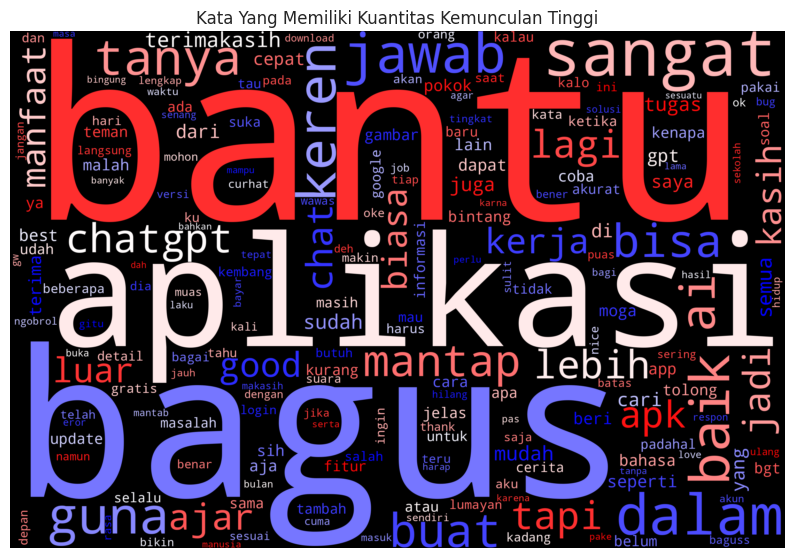

In [102]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in data_final['steamming']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


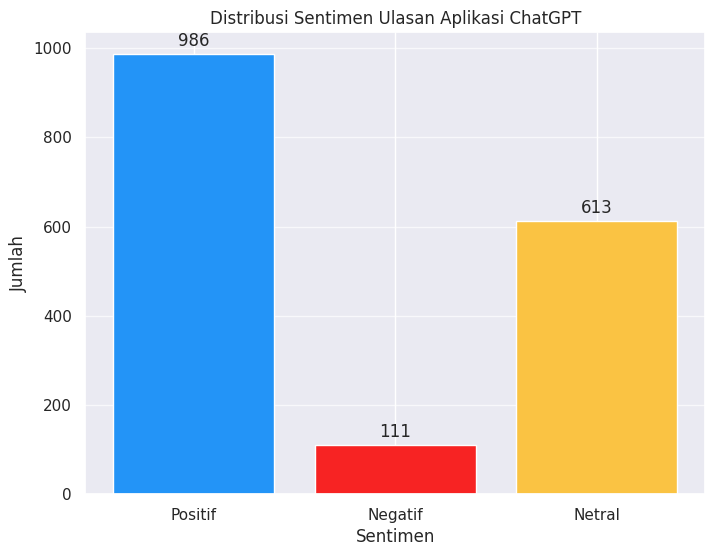

In [103]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi ChatGPT")


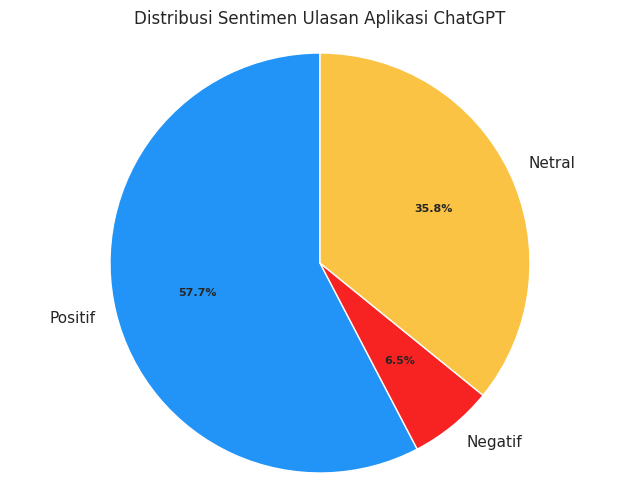

In [104]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi ChatGPT")

In [105]:
# Menghapus Sentimen Netral

data_final = data_final[data_final['sentimen'] != 'Netral']
data_final

,steamming,steamming_en,sentimen
0,bagus,Good.,Positif
2,good,good,Positif
3,mantap,Steady.,Positif
4,bagus saya cari beberapa di dan langsung ketemu,Good. I looked some up and found it right away.,Positif
7,luar biasa,Unbelievable.,Negatif
...,...,...,...
1702,bagus uji,Good test,Positif
1704,bagus bangetsangat membantuuu,It's really good. It helps me a lot.,Positif
1707,sangatt bantu dalam kerja soal,very helpful at work about,Positif
1708,all the tips and answers this bot has given me...,all the tips and answers this bot has given me...,Positif


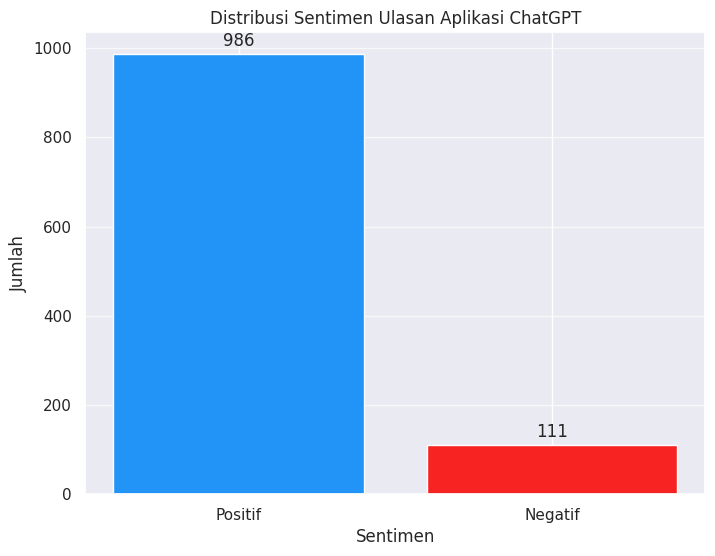

In [106]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi ChatGPT")


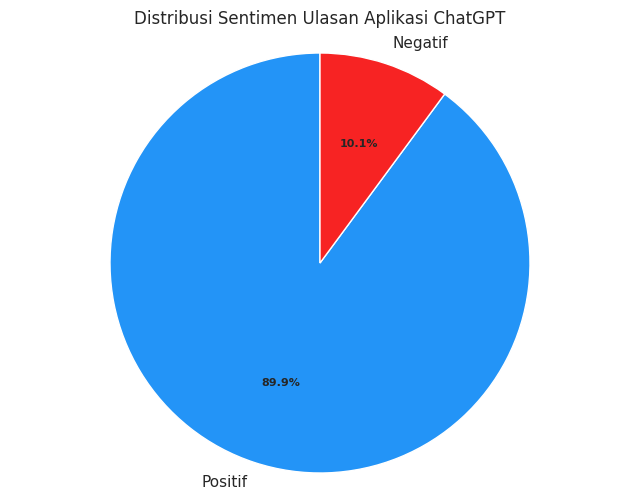

In [107]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi ChatGPT")

In [108]:
# Replace Data Sentimen

data_final = data_final.replace({'Positif':0, 'Negatif':1})
data_final

,steamming,steamming_en,sentimen
0,bagus,Good.,0
2,good,good,0
3,mantap,Steady.,0
4,bagus saya cari beberapa di dan langsung ketemu,Good. I looked some up and found it right away.,0
7,luar biasa,Unbelievable.,1
...,...,...,...
1702,bagus uji,Good test,0
1704,bagus bangetsangat membantuuu,It's really good. It helps me a lot.,0
1707,sangatt bantu dalam kerja soal,very helpful at work about,0
1708,all the tips and answers this bot has given me...,all the tips and answers this bot has given me...,0


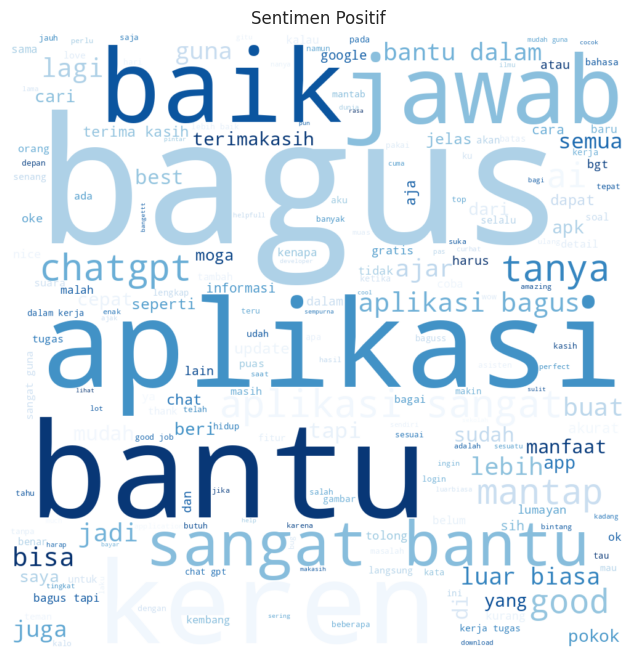

In [109]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data_final[data_final['sentimen'] == 0]
data_negatif = data_final[data_final['sentimen'] == 1]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['steamming']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

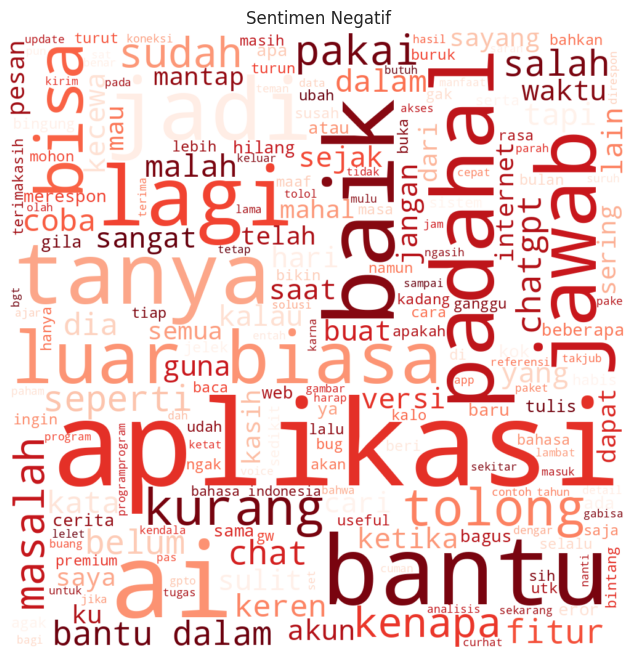

In [110]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['steamming']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

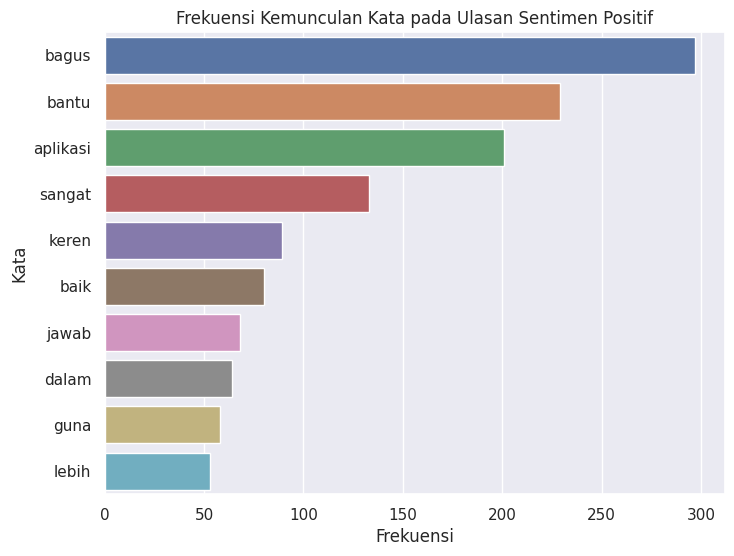

In [111]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif

# Memfilter ulasan dengan sentimen positif
positive_reviews = data_final[data_final['sentimen'] == 0]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(positive_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_positive = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_positive)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [112]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen positif : \n")
print(top_words_positive.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen positif : 

    kata  frekuensi
   bagus        297
   bantu        229
aplikasi        201
  sangat        133
   keren         89
    baik         80
   jawab         68
   dalam         64
    guna         58
   lebih         53


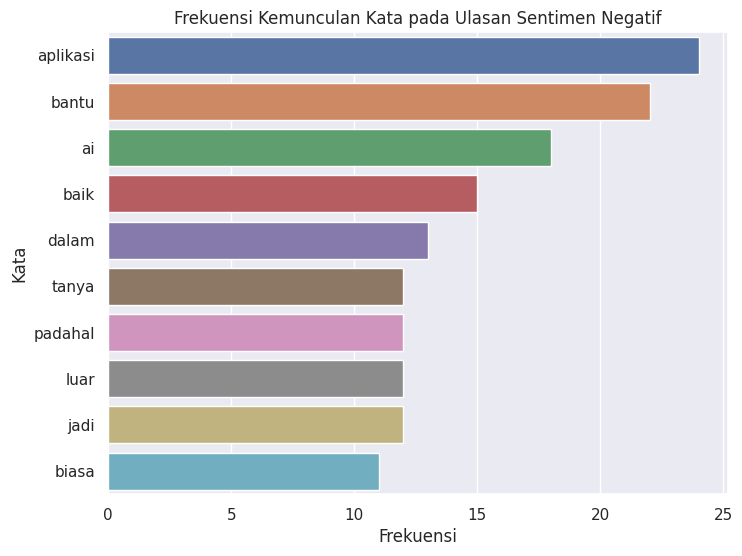

In [113]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif

# Memfilter ulasan dengan sentimen positif
negative_reviews = data_final[data_final['sentimen'] == 1]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(negative_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_negative = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_negative)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [114]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : \n")
print(top_words_negative.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : 

    kata  frekuensi
aplikasi         24
   bantu         22
      ai         18
    baik         15
   dalam         13
   tanya         12
 padahal         12
    luar         12
    jadi         12
   biasa         11


In [115]:
# Menghitung Jumlah Sentimen Positif, Negatif

data_final['sentimen'].value_counts()

sentimen
0    986
1    111
Name: count, dtype: int64

# **Transormation & Data Preparation**

In [116]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = data_final['steamming']
y = data_final['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [117]:
# Menggunakan TF - IDF Vectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [118]:
# Melakukan oversampling menggunakan Random Over-Sampling pada data latih

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vec, y_train)

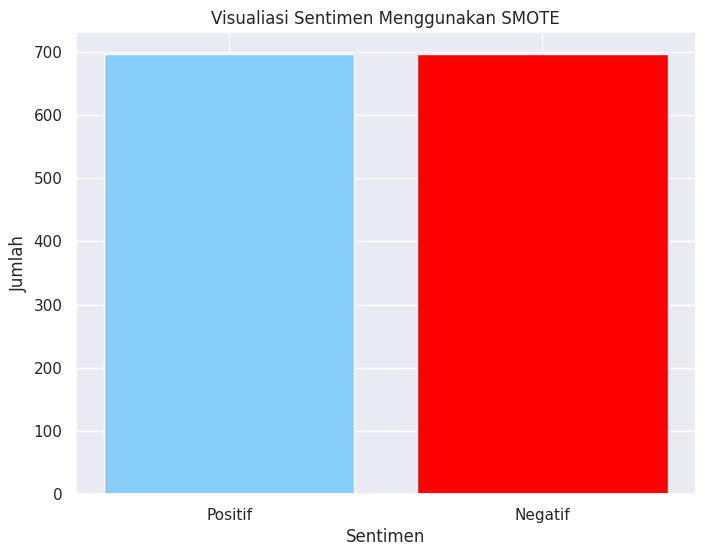

In [119]:
# Visualiasi data hasil resampling menggunakan SMOTE

sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['lightskyblue', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Negatif'])
plt.show()

# **Data Mining**

In [120]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [121]:
X_train_resampled.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [122]:
# Membangun Model Support vector Machine

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_resampled, y_train_resampled)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.8303030303030303
Akurasi untuk c = 0.05: 0.8393939393939394
Akurasi untuk c = 0.25: 0.8515151515151516
Akurasi untuk c = 0.5: 0.8515151515151516
Akurasi untuk c = 0.75: 0.8575757575757575
Akurasi untuk c = 1: 0.8575757575757575


In [123]:
# Menginisialisasi classifier SVM linier,
# membungkusnya dengan model kalibrasi untuk meningkatkan prediksi probabilitasnya,
# dan kemudian melatih model gabungan tersebut pada data pelatihan.

linear_svc = LinearSVC(C = 1.0)
calibrated_svc = CalibratedClassifierCV(linear_svc)
calibrated_svc.fit(X_train_vec, y_train)

CalibratedClassifierCV(estimator=LinearSVC())

# **Interpretation / Evaluation**


1.   Classification Report
2.   Confusion Matrix
3.   Classification Accuracy
4.   Classification Error




In [124]:
# Final Accuracy Score Model

print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.8575757575757575 


In [125]:
# Classification Report

from sklearn.metrics import confusion_matrix

# Evaluasi Model
y_pred = svm.predict(X_test_vec)
print('Akurasi Model Support Vector Machine : {:.4f}' .format(svm.score(X_test_vec, y_test)))

print("\nLaporan Klasifikasi :\n", classification_report(y_test, y_pred))

Akurasi Model Support Vector Machine : 0.8576

Laporan Klasifikasi :
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       290
           1       0.37      0.25      0.30        40

    accuracy                           0.86       330
   macro avg       0.64      0.60      0.61       330
weighted avg       0.84      0.86      0.85       330



In [126]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])

print('\nTrue Negatives (TN) = ', cm[1, 1])

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])



print('\nAccuracy = ', accuracy)

Confusion matrix

 [[273  17]
 [ 30  10]]

True Positives (TP) =  273

True Negatives (TN) =  10

False Positives (FP) =  17

False Negatives (FN) =  30

Accuracy =  0.8575757575757575


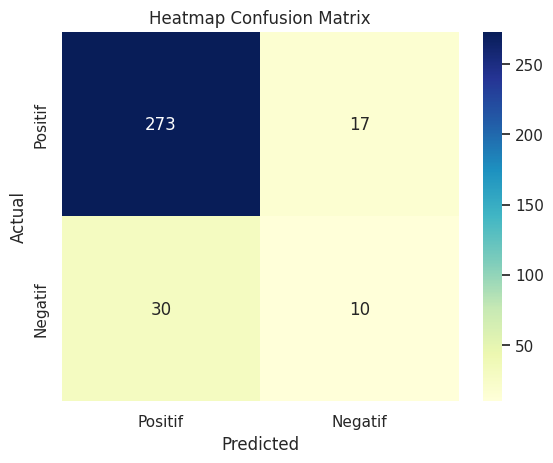

In [127]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Positif', 'Negatif'],
                         index=['Positif', 'Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [128]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


In [129]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8576


In [130]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1424


# **Testing**

In [131]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Sangat bagus, dalam beberapa kondisi sudah bisa menggantikan search engine. Ketika menanyakan sesuatu dijawab dengan sangat detail, bahkan dengan pertanyaan yang berat seperti struktur kalimat dalam bahasa asing, matematika tingkat lanjut, dan coding bisa dijawab dengan detail.
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 92.29%
Probabilitas: 92.28519328507903 %


In [132]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Untuk overall bagus banget membantu bgt dalam proses belajar apalagi matematika tetapi ada satu kekurangan kenapa harus menggunakan notasi matematika yang komples seperti frac left right itu akan sangat mengganggu mohon dihilangkan dan diganti dengan simbol yang tepat
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 92.34%
Probabilitas: 92.3433995503068 %
